# **Intro:**
*   Author: Santanam Wishal
*   Project: Machine Learning - Sentiment Analysis
*   LinkedIn: www.linkedin.com/in/santawishal
*   GitHub: https://github.com/kianaaa19/











**Sentiment Analysis Review APK Play Store**

Welcome to this Play Store APK Review Sentiment Analysis project! In this rapidly evolving digital age, user reviews play an important role in shaping the perception of mobile apps. In this project, we will explore the world of sentiment analysis to understand how people perceive and express their opinions about apps on the Google Play Store.

Sentiment analysis is one of the important branches of natural language processing that allows us to automatically identify whether user reviews tend to be positive or negative.
negative. Thus, this project will help us in understanding user feedback better, and can be used to take better decisions in app development and improvement.

In this journey, we will explore important concepts in sentiment analysis, such as text processing, feature extraction, and the use of machine learning models to predict review sentiment. We will use the Python programming language and some popular libraries such as NLTK, scikit-learn, and TensorFlow.

Surely, this project will give you valuable insights in sentiment analysis and relevant programming skills. Let's start understanding how we can uncover the sentiment behind user reviews on the Play Store!

# **Import Library**

In [1]:
!pip install google-play-scraper

In [2]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all

The above command will download and install the google_play_scraper library as well as its dependencies if required. Once the installation is complete, you can import and use it in your notebook to retrieve data from the Play Store and proceed with sentiment analysis.

In [3]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teksfrom tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, BatchNormalization, GlobalAveragePooling1D, LSTM, Flatten
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.2 MB/s eta 0:00:00


In [4]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Scapping Dataset

In this project, we will perform sentiment analysis on user reviews and opinions regarding the “Honor of Kings” app on the Play Store. Sentiment analysis will help us to understand how users feel and express their views on this app.

Using various text processing techniques and machine learning algorithms, we will try to identify whether user reviews of the “Honor of Kings” app are positive, negative or neutral. The results of this sentiment analysis can provide valuable insights to app developers to improve user experience. Let's start exploring user reviews and analyze the sentiment around the “Honor of Kings” app in more depth.

In [5]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews_all, Sort

# Mengambil semua ulasan dari aplikasi dengan ID ''com.levelinfinite.sgameGlobal' di Google Play Store.
# Proses scraping mungkin memerlukan beberapa saat tergantung pada jumlah ulasan yang ada.
scrapreview = reviews_all(
    'com.levelinfinite.sgameGlobal',          # ID aplikasi
    lang='id',             # Bahasa ulasan (default: 'en')
    country='id',          # Negara (default: 'us')
    sort=Sort.MOST_RELEVANT, # Urutan ulasan (default: Sort.MOST_RELEVANT)
    count=15000             # Jumlah maksimum ulasan yang ingin diambil
)

In [6]:
# Menyimpan ulasan dalam file CSV
import csv

with open('ulasan_aplikasi.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])  # Menulis header kolom
    for review in scrapreview:
        writer.writerow([review['content']])  # Menulis konten ulasan ke dalam file CSV

# Loading Dataset

In [7]:
app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('ulasan_aplikasi.csv', index=False)

In [8]:
# Membuat DataFrame dari hasil scrapreview
app_reviews_df = pd.DataFrame(scrapreview)

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape


In [9]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,eb22251e-f734-45fb-baa0-967d0db3b5a7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Game nya bagus, enjoy mainnya, event buat new ...",3,354,9.4.1.4,2024-07-02 08:39:20,"Hai pemain, \nKami telah mencatat saran kamu s...",2024-07-02 08:34:49,9.4.1.4
1,cf732a7a-7f4b-4d64-a199-1c199b15c300,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Ping sangat tidak stabil, ping hijau tapi kara...",1,2802,9.4.1.3,2024-07-04 02:07:45,"Hai pemain, \nKami paham rasamu. Jika ada situ...",2024-07-04 07:24:16,9.4.1.3
2,8541724d-6ae9-4da3-a723-0622d267a6dd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ini bagi yang HP nya ram 2 tidak dianjurkan ma...,1,338,9.4.1.4,2024-07-02 17:13:10,"Hai pemain, \nKami paham rasamu. Jika ada situ...",2024-07-03 10:54:30,9.4.1.4
3,30883247-5520-441d-bbf8-fd9bf0753b8f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Overal untuk semua udah perfect dari event-eve...,3,60,9.4.1.3,2024-07-03 06:57:48,None,NaT,9.4.1.3
4,aa5592b1-bfd6-48ee-ac91-810b69c080f6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Grafik bagus, heronya banyak, dan bisa dapat s...",4,2648,9.4.1.3,2024-06-25 09:18:23,None,NaT,9.4.1.3


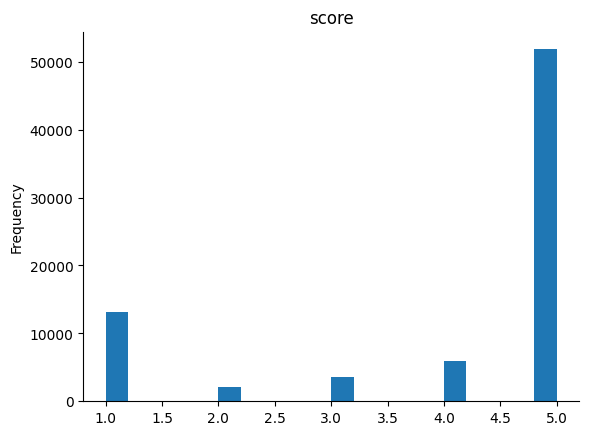

In [184]:
# @title score

from matplotlib import pyplot as plt
app_reviews_df['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
# Menampilkan informasi tentang DataFrame app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76477 entries, 0 to 76476
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              76477 non-null  object        
 1   userName              76477 non-null  object        
 2   userImage             76477 non-null  object        
 3   content               76476 non-null  object        
 4   score                 76477 non-null  int64         
 5   thumbsUpCount         76477 non-null  int64         
 6   reviewCreatedVersion  56074 non-null  object        
 7   at                    76477 non-null  datetime64[ns]
 8   replyContent          7312 non-null   object        
 9   repliedAt             7312 non-null   datetime64[ns]
 10  appVersion            56074 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 6.4+ MB


In [11]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = app_reviews_df.dropna()

In [12]:
# Menampilkan informasi tentang DataFrame clean_df setelah membersihkan nilai yang hilang (NaN)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4791 entries, 0 to 68207
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              4791 non-null   object        
 1   userName              4791 non-null   object        
 2   userImage             4791 non-null   object        
 3   content               4791 non-null   object        
 4   score                 4791 non-null   int64         
 5   thumbsUpCount         4791 non-null   int64         
 6   reviewCreatedVersion  4791 non-null   object        
 7   at                    4791 non-null   datetime64[ns]
 8   replyContent          4791 non-null   object        
 9   repliedAt             4791 non-null   datetime64[ns]
 10  appVersion            4791 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 449.2+ KB


In [13]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

##Preprocessing

Here are some functions used to clean and process text. Here is a brief explanation of each function:

1. `cleaningText(text)`: This function is used to clean the text with several steps, such as removing mentions, hashtags, RT (retweet), links, numbers, and punctuation. In addition, it also replaces newline characters with spaces and removes extra spaces at the beginning and end of the text.

2. `casefoldingText(text)`: This function converts all characters in the text to lowercase, making the text more uniform.

3. `tokenizingText(text)`: This function is used to split the text into a list of words or tokens. This is useful for parsing text into basic components.

4. `filteringText(text)`: This function is used to remove stopwords in the text. You have updated the list of stop words with some additional words.

5. `stemmingText(text)`: This function applies stemming to the text, which reduces words to their base form. You use the Sastrawi library to perform stemming in Indonesian.

6. `toSentence(list_words)`: This function is used to combine a list of words into a sentence.

You can use these functions in your project to clean, process, and prepare the text before performing sentiment analysis. 

In [14]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [15]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

The slang dictionary or list of slang words that you provide is a collection of Indonesian slang words along with their translation or meaning in formal language. The functions of a slang dictionary like this are:

1. **Defining Slang:** A slang dictionary helps people who may not be familiar with slang or expressions used in certain circles to understand the meaning of these words.

2. **Informal Communication:** Slang is often used in informal conversations or on social media. Slang dictionaries help people to communicate in a more relaxed and contextually appropriate style.

3. **Pop Culture Understanding:** Slang is often related to pop culture and can reflect trends and changes in language. Slang dictionaries allow people to follow and understand the language in this cultural context.

4. **Literary and Writing Uses:** Writers or speakers may want to use slang in their writing to create a certain effect or express a more realistic character or setting. A slang dictionary can help them choose words appropriately.

5. **Entertainment and Curiosity:** Some people may be interested in learning slang just for entertainment or out of curiosity for language variations and expressions in everyday language.

Remember that the use of slang should be tailored to the context and audience. 

In [16]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,eb22251e-f734-45fb-baa0-967d0db3b5a7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Game nya bagus, enjoy mainnya, event buat new ...",3,354,9.4.1.4,2024-07-02 08:39:20,"Hai pemain, \nKami telah mencatat saran kamu s...",2024-07-02 08:34:49,9.4.1.4
1,cf732a7a-7f4b-4d64-a199-1c199b15c300,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Ping sangat tidak stabil, ping hijau tapi kara...",1,2802,9.4.1.3,2024-07-04 02:07:45,"Hai pemain, \nKami paham rasamu. Jika ada situ...",2024-07-04 07:24:16,9.4.1.3
2,8541724d-6ae9-4da3-a723-0622d267a6dd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ini bagi yang HP nya ram 2 tidak dianjurkan ma...,1,338,9.4.1.4,2024-07-02 17:13:10,"Hai pemain, \nKami paham rasamu. Jika ada situ...",2024-07-03 10:54:30,9.4.1.4
10,e68a07bd-7f58-4940-a650-7d78b7c1bc7b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sistem mengunduh data yg menjengkelkan dan ket...,2,1663,9.4.1.3,2024-06-21 01:12:23,"Hai pemain, \nKami paham rasamu. Jika ada situ...",2024-06-24 09:05:56,9.4.1.3
13,af97bf5d-e023-4ec9-afe8-b2b4b9367d70,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Masih banyak bug,jaringan selalu merah dan lag...",1,1090,9.4.1.3,2024-06-25 21:05:14,"Hai pemain, \nKami paham rasamu. Jika ada situ...",2024-06-26 11:49:13,9.4.1.3
...,...,...,...,...,...,...,...,...,...,...,...
68164,6caf0f24-718f-4f00-9bef-f305f92c3d41,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Very unbalanced game at all.. I'm pretty sure ...,1,72,8.3.1.4,2023-07-08 20:57:57,"Hi, Demi Honorofking!\nWe are sorry for the un...",2023-07-12 07:02:07,8.3.1.4
68167,9ce99d1a-eb8b-4f2b-8c66-e7922d84d130,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Thank you for the review after that it can alr...,5,2,8.3.1.4,2023-07-18 07:36:16,"Hi, Ibram Raka W!\nWe suggest you try the foll...",2023-07-18 07:15:15,8.3.1.4
68169,68ac110a-e10e-4e56-b9c8-e0fe4886f5f0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,unfair when meeting opponents,1,12,8.3.1.4,2023-08-17 07:06:12,"Hi, player!\nO sistema de pareamento está semp...",2023-08-19 11:08:42,8.3.1.4
68189,48f93ba1-44d0-49f6-ad44-c7b51937e1c6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,4 Star First. I need xi shi and yuan ge real q...,4,0,8.2.1.18,2023-06-28 07:38:14,"Hi, Gemoy Banget!\nThank you for your interest...",2023-06-29 02:10:06,8.2.1.18


In [17]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [18]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,eb22251e-f734-45fb-baa0-967d0db3b5a7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Game nya bagus, enjoy mainnya, event buat new ...",3,354,9.4.1.4,2024-07-02 08:39:20,"Hai pemain, \nKami telah mencatat saran kamu s...",2024-07-02 08:34:49,9.4.1.4,Game nya bagus enjoy mainnya event buat new pl...,game nya bagus enjoy mainnya event buat new pl...,game nya bagus enjoy mainnya event buat new pl...,"[game, nya, bagus, enjoy, mainnya, event, buat...","[game, bagus, enjoy, mainnya, event, new, play...",game bagus enjoy mainnya event new player mena...
1,cf732a7a-7f4b-4d64-a199-1c199b15c300,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Ping sangat tidak stabil, ping hijau tapi kara...",1,2802,9.4.1.3,2024-07-04 02:07:45,"Hai pemain, \nKami paham rasamu. Jika ada situ...",2024-07-04 07:24:16,9.4.1.3,Ping sangat tidak stabil ping hijau tapi karak...,ping sangat tidak stabil ping hijau tapi karak...,ping sangat tidak stabil ping hijau tapi karak...,"[ping, sangat, tidak, stabil, ping, hijau, tap...","[ping, stabil, ping, hijau, karakter, jalan, t...",ping stabil ping hijau karakter jalan tersenda...
2,8541724d-6ae9-4da3-a723-0622d267a6dd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ini bagi yang HP nya ram 2 tidak dianjurkan ma...,1,338,9.4.1.4,2024-07-02 17:13:10,"Hai pemain, \nKami paham rasamu. Jika ada situ...",2024-07-03 10:54:30,9.4.1.4,Ini bagi yang HP nya ram tidak dianjurkan mai...,ini bagi yang hp nya ram tidak dianjurkan mai...,ini bagi yang hp nya ram tidak dianjurkan main...,"[ini, bagi, yang, hp, nya, ram, tidak, dianjur...","[hp, ram, dianjurkan, main, jaringan, penyimpa...",hp ram dianjurkan main jaringan penyimpanan ra...
10,e68a07bd-7f58-4940-a650-7d78b7c1bc7b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sistem mengunduh data yg menjengkelkan dan ket...,2,1663,9.4.1.3,2024-06-21 01:12:23,"Hai pemain, \nKami paham rasamu. Jika ada situ...",2024-06-24 09:05:56,9.4.1.3,Sistem mengunduh data yg menjengkelkan dan ket...,sistem mengunduh data yg menjengkelkan dan ket...,sistem mengunduh data yang menjengkelkan dan k...,"[sistem, mengunduh, data, yang, menjengkelkan,...","[sistem, mengunduh, data, menjengkelkan, jeda,...",sistem mengunduh data menjengkelkan jeda mengu...
13,af97bf5d-e023-4ec9-afe8-b2b4b9367d70,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Masih banyak bug,jaringan selalu merah dan lag...",1,1090,9.4.1.3,2024-06-25 21:05:14,"Hai pemain, \nKami paham rasamu. Jika ada situ...",2024-06-26 11:49:13,9.4.1.3,Masih banyak bugjaringan selalu merah dan lagg...,masih banyak bugjaringan selalu merah dan lagg...,masih banyak bugjaringan selalu merah dan lagg...,"[masih, banyak, bugjaringan, selalu, merah, da...","[bugjaringan, merah, lagging, mengganggu, seka...",bugjaringan merah lagging mengganggu sekalidan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68164,6caf0f24-718f-4f00-9bef-f305f92c3d41,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Very unbalanced game at all.. I'm pretty sure ...,1,72,8.3.1.4,2023-07-08 20:57:57,"Hi, Demi Honorofking!\nWe are sorry for the un...",2023-07-12 07:02:07,8.3.1.4,Very unbalanced game at all Im pretty sure it ...,very unbalanced game at all im pretty sure it ...,very unbalanced game at all im pretty sure it ...,"[very, unbalanced, game, at, all, im, pretty, ...","[unbalanced, game, im, pretty, sure, wont, sel...",unbalanced game im pretty sure wont sell globa...
68167,9ce99d1a-eb8b-4f2b-8c66-e7922d84d130,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Thank you for the review after that it can alr...,5,2,8.3.1.4,2023-07-18 07:36:16,"Hi, Ibram Raka W!\nWe suggest you try the foll...",2023-07-18 07:15:15,8.3.1.4

##Pelabelan

In [19]:
length = clean_df['content'].str.len().max()
lexicon_positive = pd.read_excel('kamus_positive.xlsx')
lexicon_positive_dict = {}
for index, row in lexicon_positive.iterrows():
    if row[0] not in lexicon_positive_dict:
        lexicon_positive_dict[row[0]] = row[1]

lexicon_negative = pd.read_excel('kamus_negative.xlsx')
lexicon_negative_dict = {}
for index, row in lexicon_negative.iterrows():
    if row[0] not in lexicon_negative_dict:
        lexicon_negative_dict[row[0]] = row[1]

def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if (word in lexicon_positive_dict):
            score = score + lexicon_positive_dict[word]
    for word in text:
        if (word in lexicon_negative_dict):
            score = score + lexicon_negative_dict[word]
    sentimen=''
    if (score > 0):
        sentimen = 'Positive'
    elif (score < 0):
        sentimen = 'Negative'
    else:
        sentimen = 'Neutral'
    return score, sentimen

results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
Negative    2596
Positive    1390
Neutral      805
Name: count, dtype: int64


In [20]:
clean_df = clean_df.drop(columns=['reviewId',	'userName',	'userImage',	'content',	'score',	'thumbsUpCount',	'reviewCreatedVersion',	'at',	'replyContent',	'repliedAt',	'appVersion',	'text_clean',	'text_casefoldingText',	'text_slangwords',	'text_tokenizingText',	'text_stopword'])
clean_df.head()

,text_akhir,polarity_score,polarity
0,game bagus enjoy mainnya event new player mena...,8,Positive
1,ping stabil ping hijau karakter jalan tersenda...,-26,Negative
2,hp ram dianjurkan main jaringan penyimpanan ra...,14,Positive
10,sistem mengunduh data menjengkelkan jeda mengu...,-22,Negative
13,bugjaringan merah lagging mengganggu sekalidan...,1,Positive


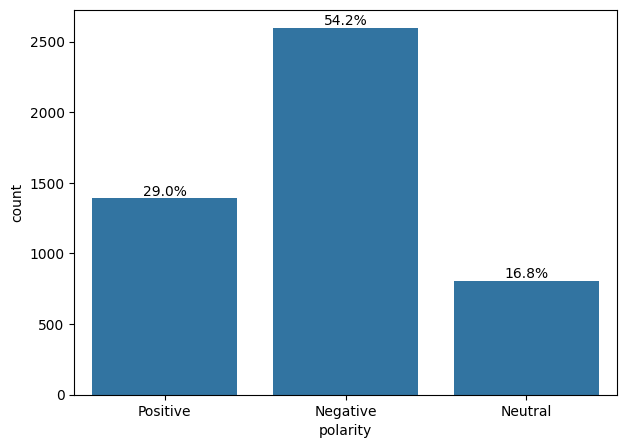

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7, 5));
g = sns.countplot(x='polarity', data=clean_df)

ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / clean_df.shape[0]:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=10, color='black', rotation=0, xytext=(0, 5),
         textcoords='offset points')

In [22]:
clean_df.to_csv("sentiment results", index=False)

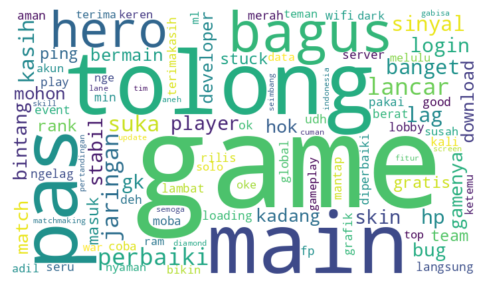

In [23]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

new_df=clean_df[clean_df['polarity']=='Positive']
words = ' '.join(new_df['text_akhir'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=700, height=400, max_words = 100, collocations=False
                     ).generate(words)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

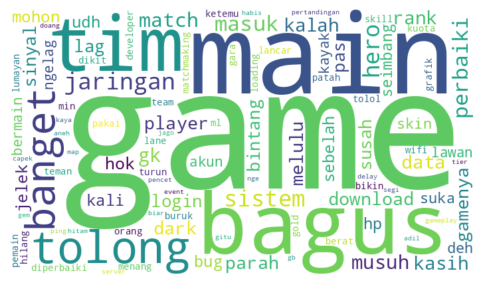

In [24]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

new_df=clean_df[clean_df['polarity']=='Negative']
words = ' '.join(new_df['text_akhir'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=700, height=400, max_words = 100, collocations=False
                     ).generate(words)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

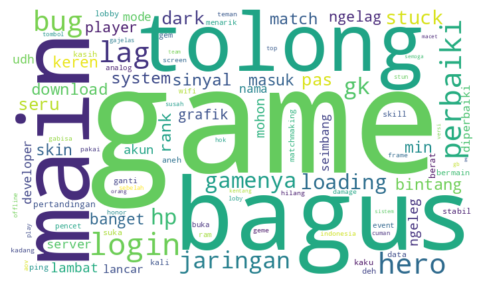

In [25]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

new_df=clean_df[clean_df['polarity']=='Neutral']
words = ' '.join(new_df['text_akhir'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=700, height=400, max_words = 100, collocations=False
                     ).generate(words)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

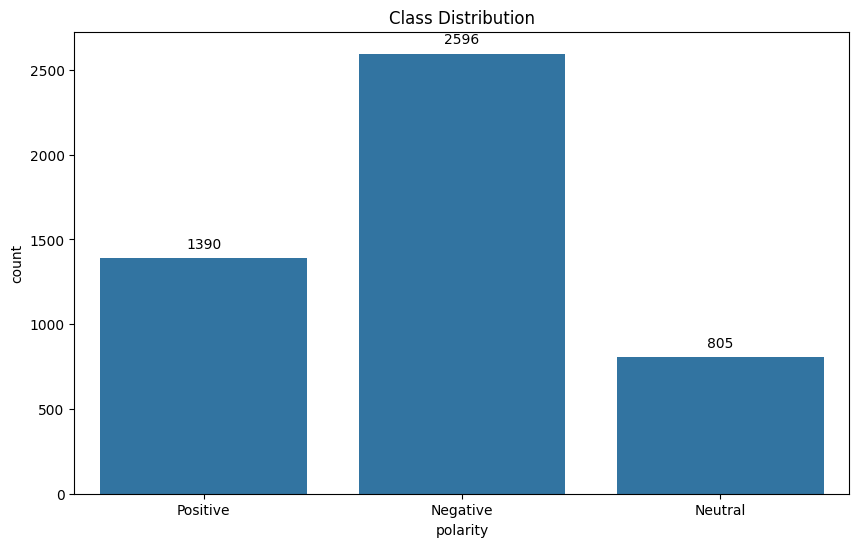

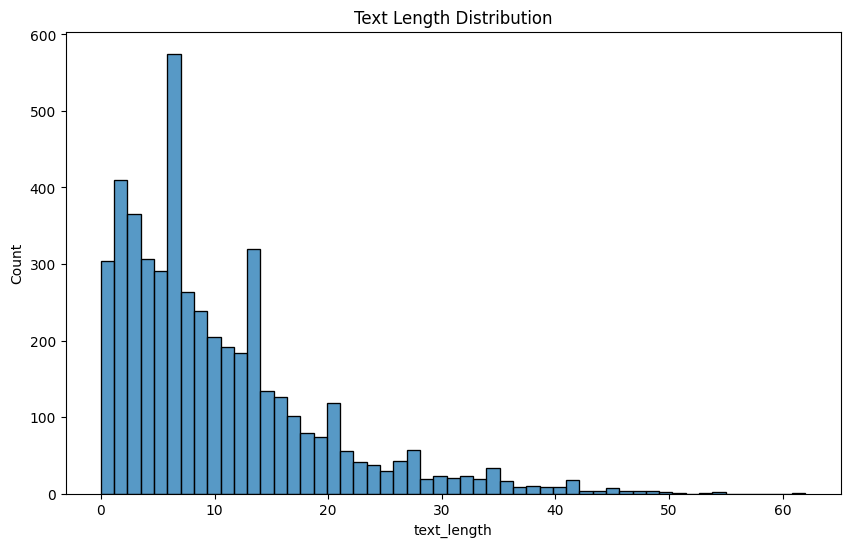

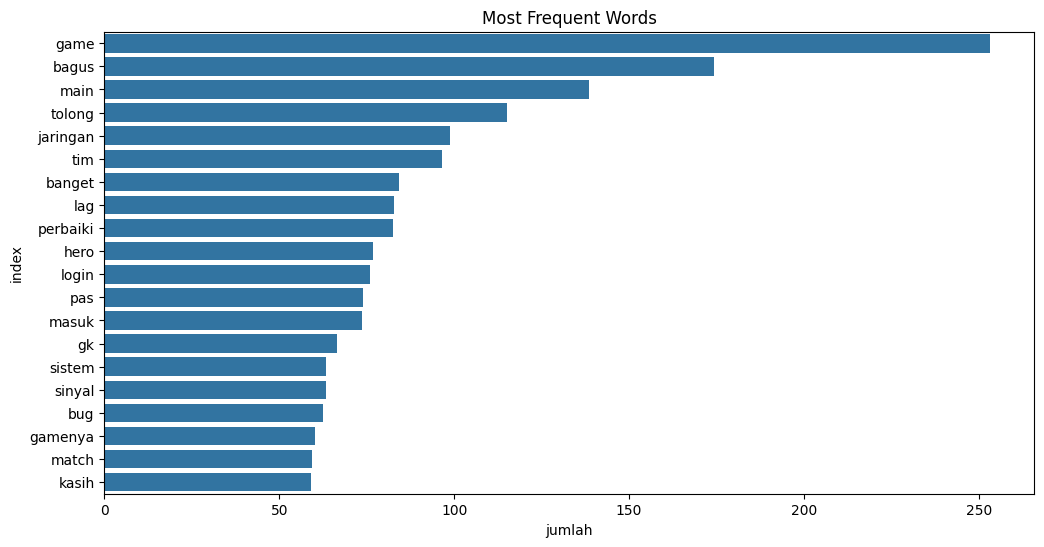

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Set the figure size
plt.figure(figsize=(10, 6))

# Check class distribution
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Visualize text length distribution
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

In [37]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score
from tensorflow.keras import Sequential

## **Data Splitting**

In [38]:
clean_df.head(2)

,text_akhir,polarity_score,polarity,text_length
0,g a m e b a g u s e n j o y m a i n n y ...,8,Positive,28
1,p i n g s t a b i l p i n g h i j a u ...,-26,Negative,45


In [82]:
# Drop Unused Column
pre_df = clean_df.copy()
pre_df = pre_df.drop(columns=['polarity_score','text_length'])

In [83]:
# One-Hot Encoding
category = pd.get_dummies(pre_df.polarity)
category = category.astype(int)
df = pd.concat([pre_df, category], axis=1)
df = df.drop(columns='polarity')
df

,text_akhir,Negative,Neutral,Positive
0,g a m e b a g u s e n j o y m a i n n y ...,0,0,1
1,p i n g s t a b i l p i n g h i j a u ...,1,0,0
2,h p r a m d i a n j u r k a n m a i n ...,0,0,1
3,s i s t e m m e n g u n d u h d a t a m ...,1,0,0
4,b u g j a r i n g a n m e r a h l a g g i ...,0,0,1
...,...,...,...,...
19159,u n b a l a n c e d g a m e i m p r e t ...,0,0,1
19160,t h a n k r e v i e w a l r e a d y t e ...,0,0,1
19161,u n f a i r m e e t i n g o p p o n e n t s,0,1,0
19162,s t a r f i r s t n e e d x i s h i ...,0,0,1


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19164 entries, 0 to 19163
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text_akhir  19164 non-null  object
 1   Negative    19164 non-null  int64 
 2   Neutral     19164 non-null  int64 
 3   Positive    19164 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 599.0+ KB


In [85]:
# Cek apakah ada Na pada data
df.isna().sum()

text_akhir    0
Negative      0
Neutral       0
Positive      0
dtype: int64

In [86]:
# Cek apakah ada Null pada data
df.isnull().sum()

text_akhir    0
Negative      0
Neutral       0
Positive      0
dtype: int64

In [87]:
# Apply Variable
data = df['text_akhir'].values
label = df[['Negative', 'Neutral', 'Positive']].values

In [88]:
# Stop Words
stop_words = set(stopwords.words('indonesian'))

df['text_akhir'] = df['text_akhir'].apply(lambda x: ' '.join([w for w in x if not w.lower() in stop_words]))

In [89]:
# Split Dataset
length = df['text_akhir'].str.len().max()
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2)

In [90]:
# Tokenization
tokenizer = nltk.RegexpTokenizer(r"\w+")
tokenizer = tokenizer
tokenizer = Tokenizer(num_words=length, oov_token='')
tokenizer.fit_on_texts(x_train)

seq_train = tokenizer.texts_to_sequences(x_train)
seq_test = tokenizer.texts_to_sequences(x_test)

padded_train = pad_sequences(seq_train,
                             maxlen=64,
                             padding='post',
                             truncating='post'
                             )
padded_test = pad_sequences(seq_test,
                            maxlen=64,
                            padding='post',
                            truncating='post'
                             )

In [91]:
# Architecture
model = Sequential([
    Embedding(input_dim=length, output_dim=64),
    LSTM(64, return_sequences=True),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    GlobalAveragePooling1D(),
    Dense(3, activation='softmax')
])

In [92]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 64)          97344     
                                                                 
 lstm_9 (LSTM)               (None, None, 64)          33024     
                                                                 
 batch_normalization_4 (Bat  (None, None, 64)          256       
 chNormalization)                                                
                                                                 
 dropout_9 (Dropout)         (None, None, 64)          0         
                                                                 
 dense_16 (Dense)            (None, None, 64)          4160      
                                                                 
 dropout_10 (Dropout)        (None, None, 64)          0         
                                                      

In [93]:
# Model Compile
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [94]:
# Callback Function
class myCallback(Callback):
   def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.92 and logs.get('val_accuracy') >= 0.92):
            print("\nAkurasi dan Validation Accuration sudah mencapai 92%", "\nEpoch: ", epoch)
            self.model.stop_training = True

callbacks = myCallback()

In [95]:
# Auto Reduction
auto_reduction = ReduceLROnPlateau(
    monitor = 'val_accuracy',
    patience = 15, # Jika setelah 25 epochs tidak ada peningkatan, maka reduce LR by factor
    verbose = 2,
    factor = 0.2,
    min_lr = 0.000005
)

In [96]:
# Auto Stop Learn
auto_stop_learn = EarlyStopping(
    monitor = 'val_accuracy',
    min_delta = 0,
    patience = 25,
    verbose = 2,
    mode = 'auto'
)

In [97]:
history = model.fit(
    padded_train,
    y_train,
    epochs = 50,
    batch_size = 32,
    callbacks=[callbacks, auto_reduction, auto_stop_learn],
    validation_data = (padded_test, y_test),
    verbose = 2
)

Epoch 1/50
480/480 - 32s - loss: 0.9129 - accuracy: 0.5678 - val_loss: 0.9609 - val_accuracy: 0.5518 - lr: 0.0010 - 32s/epoch - 67ms/step
Epoch 2/50
480/480 - 32s - loss: 0.8881 - accuracy: 0.5889 - val_loss: 0.8765 - val_accuracy: 0.5896 - lr: 0.0010 - 32s/epoch - 66ms/step
Epoch 3/50
480/480 - 35s - loss: 0.8689 - accuracy: 0.5968 - val_loss: 0.9165 - val_accuracy: 0.5348 - lr: 0.0010 - 35s/epoch - 73ms/step
Epoch 4/50
480/480 - 33s - loss: 0.8391 - accuracy: 0.6206 - val_loss: 0.8574 - val_accuracy: 0.5912 - lr: 0.0010 - 33s/epoch - 68ms/step
Epoch 5/50
480/480 - 33s - loss: 0.8131 - accuracy: 0.6362 - val_loss: 0.8412 - val_accuracy: 0.6199 - lr: 0.0010 - 33s/epoch - 68ms/step
Epoch 6/50
480/480 - 31s - loss: 0.7866 - accuracy: 0.6516 - val_loss: 0.7848 - val_accuracy: 0.6533 - lr: 0.0010 - 31s/epoch - 65ms/step
Epoch 7/50
480/480 - 30s - loss: 0.7493 - accuracy: 0.6758 - val_loss: 0.7616 - val_accuracy: 0.6694 - lr: 0.0010 - 30s/epoch - 63ms/step
Epoch 8/50
480/480 - 31s - loss: 0

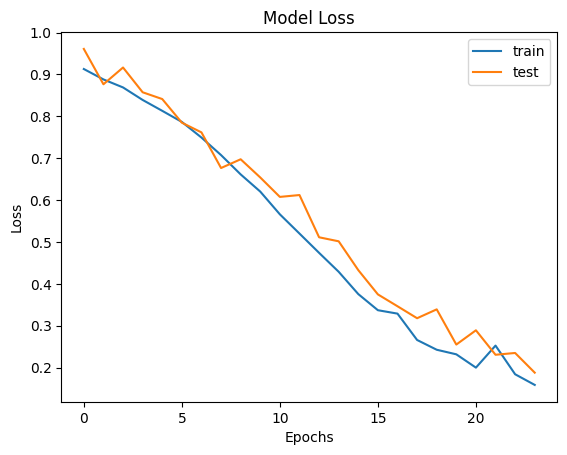

In [98]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

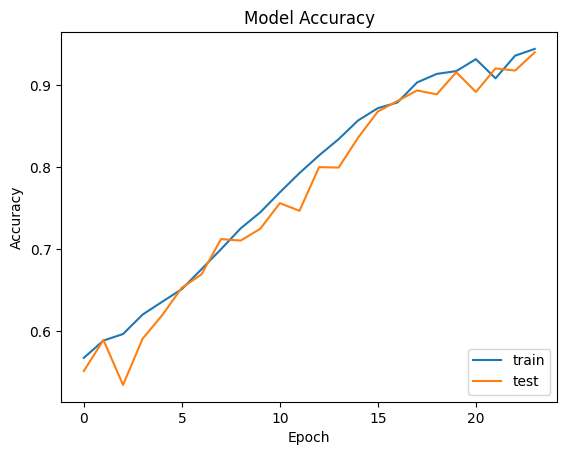

In [99]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [100]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

def predict_sentiment(model, text, tokenizer, max_len=200):
  """
  Predicts sentiment of a given text using the LSTM model.

  Args:
      model: Trained LSTM model.
      text: Text to predict sentiment for.
      tokenizer: Tokenizer used for preprocessing text.
      max_len: Maximum sequence length for padding.

  Returns:
      A tuple containing the predicted sentiment class ('Positive', 'Negative', 'Neutral')
      and the corresponding score.
  """
  # Preprocess the text
  sequences = tokenizer.texts_to_sequences([text])
  sequences = pad_sequences(sequences, maxlen=max_len)

  # Predict sentiment
  prediction = model.predict(sequences)[0]
  predicted_class = np.argmax(prediction)  # Get index of class with highest probability

  # Map predicted class to sentiment label
  sentiment_labels = ['Positive', 'Negative', 'Neutral']
  sentiment = sentiment_labels[predicted_class]

  # Calculate sentiment score based on predicted class probabilities
  score = prediction[predicted_class] - 0.5  # Adjust score based on your preference (center at 0)

  return sentiment, score

# Example usage (assuming your model and tokenizer are defined)
text = "Game rusak!"
sentiment, score = predict_sentiment(model, text, tokenizer)

print(f"Predicted sentiment: {sentiment} (Score: {score:.2f})")


1/1 [==============================] - 2s 2s/step
Predicted sentiment: Negative (Score: 0.49)


In [101]:
# Save the model
model.save('my_lstm_model.h5')
print("Model saved successfully as my_lstm_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully as my_lstm_model.h5
